In [1]:
import numpy as np
import pandas as pd
import datetime
import csv
import re
import string
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import spacy

import pattern
from pattern.en import lemma, lexeme

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss

In [2]:
with open('alexa_cleaned_sentiment.pkl','rb') as read_file:
    alexa_df = pickle.load(read_file)

In [3]:
alexa_df.head()

,rating,date,variation,verified_reviews,feedback,length,reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive


In [4]:
alexa_df['sentiment'] = np.where(alexa_df['sentiment']=='positive', '1', '0')

In [5]:
#create dictionary to do a count
count_dict_alex = {}

for doc in alexa_df['reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

dinosaur: 1
category: 1
grandaughter: 1
mile: 1
duty: 1
boost: 1
definitively: 1
input: 1
select: 1
encyclopedias: 1
dislikes: 1
spoken: 1
promp: 1
poop: 1
outsmart: 1
divertido: 1
information​: 1
iove: 1
fm: 1
speech: 1
native: 1
whose: 1
texas: 1
birth: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
dust: 1
collector: 1
satisfy: 1
receiving: 1
acknowledge: 1
indicate: 1
productsand: 1
journey: 1
surely: 1
portion: 1
leary: 1
puny: 1
wear: 1
tear: 1
mint: 1
teenager: 1
insist: 1
simplicity: 1
gazebo: 1
diagnostic: 1
roomba: 1
sentence: 1
shock: 1
clone: 1
boat: 1
garage: 1
gf: 1
intermittently: 1
pulsate: 1
pulse: 1
buddy: 1
psychological: 1
excellently: 1
whe: 1
recondition: 1
pare: 1
weary: 1
actively: 1
release: 1
widespread: 1
prevent: 1
cortna: 1
alive: 1
thumb: 1
workreat: 1
spank: 1
wherever: 1
cordthank: 1
brandnew: 1
output: 1
vintage: 1
longevity: 1
bough: 1
🏾: 1
detect: 1
electronically: 1
savy: 1
sink: 1
refurbishedthought: 1
closed: 1
backyard: 1
junk: 1
soft: 1
laud: 1

emoji: 2
accustom: 2
pup: 2
calm: 2
calmer: 2
bark: 2
expert: 2
engagement: 2
tempt: 2
este: 2
producto: 2
llegó: 2
semana: 2
quedó: 2
sin: 2
olor: 2
perdió: 2
toda: 2
escencia: 2
huele: 2
solo: 2
alcohol: 2
barry: 2
adult: 2
dead: 2
stat: 2
itune: 3
anypod: 3
intrusive: 3
mobile: 3
glitch: 3
bargain: 3
en: 3
😍: 3
extent: 3
fio: 3
controll: 3
pass: 3
material: 3
secretary: 3
besides: 3
million: 3
style: 3
quicker: 3
twist: 3
press: 3
elsewhere: 3
mood: 3
woofer: 3
tweeter: 3
title: 3
informative: 3
nature: 3
query: 3
worthless: 3
till: 3
checking: 3
technologically: 3
rechargeable: 3
sport: 3
specify: 3
southern: 3
hot: 3
hearing: 3
seamless: 3
manufacturer: 3
tvs: 3
fabulous: 3
invest: 3
warehouse: 3
damage: 3
knock: 3
curve: 3
sleeping: 3
hesitate: 3
unbelievable: 3
holder: 3
nobody: 3
comment: 3
car: 3
action: 3
wind: 3
loving: 3
technically: 3
blow: 3
ac: 3
integration: 3
superior: 3
whenever: 3
prepare: 3
invasive: 3
supply: 3
dedicated: 3
phillip: 3
dollar: 3
center: 3
n: 3
attac

In [6]:
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [7]:
#create corpus

corpus = (doc.split() for doc in alexa_df['reviews'])

clean_corpus_list= []
for document in corpus:
    clean_corpus_list.append([word for word in document if word not in bad_words])
clean_corpus_list
  
clean_corpus=[]
for item in clean_corpus_list:
    item = ' '.join(item)
    clean_corpus.append(item)
    
clean_corpus

['love echo',
 'love',
 'sometimes play game answer question alexa say get wrong answer like able turn light away home',
 'lot fun thing old learn control light play game like nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily find smart speaker can not wait see else',
 'think one purchase work get one every room house really like feature offer play music echos control light throughout house',
 'look great',
 'love -PRON- have listen song have not hear since news weather information -PRON- ’ great',
 'send year old dad talk constantly',
 'love learn know thing still figure everything work far easy use understand make laugh time',
 'purchase mother problem give something try come get around fast like enjoy little big thing alexa play song time cook',
 'love love love',
 'expect',
 'love wife',
 'really happy purchase great speaker easy set',
 'use alexa couple day lot fun new toy like new household try learn different come',
 'l

#### CountVectorizer

In [8]:
#bag of words
cv = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)

In [9]:
X = cv.fit_transform(clean_corpus).toarray()
y = alexa_df['feedback'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
log = LogisticRegression()
log.fit(X_train, y_train)

print("Training: {:6.2f}%".format(100*log.score(X_train, y_train)))
print("Validate: {:6.2f}%".format(100*log.score(X_test, y_test)))
print("Log-loss: {:6.4f}".format(log_loss(y_test, log.predict_proba(X_test))))

Training:  97.04%
Validate:  94.78%
Log-loss: 0.1621


/Users/kelseyheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
y_pred = log.predict(X_test)
log_cv = confusion_matrix(y_test, y_pred)
log_class = classification_report(y_test, y_pred)
print(log_cv)
print(log_class)

[[ 28  41]
 [  6 825]]
              precision    recall  f1-score   support

           0       0.82      0.41      0.54        69
           1       0.95      0.99      0.97       831

    accuracy                           0.95       900
   macro avg       0.89      0.70      0.76       900
weighted avg       0.94      0.95      0.94       900



Text(0.5, 15.0, 'predicted')

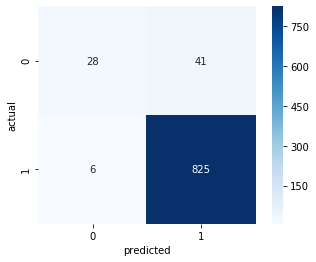

In [13]:
sns.heatmap(log_cv, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.ylabel('actual')
plt.xlabel('predicted')


#### TFIDF

In [14]:
tfidf_vec = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vec.fit_transform(alexa_df['reviews'])

In [15]:
X2 = tfidf_vec.fit_transform(clean_corpus).toarray()
y2 = alexa_df['feedback'].values

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [17]:
og = LogisticRegression()
log.fit(X_train2, y_train2)

print("Training: {:6.2f}%".format(100*log.score(X_train2, y_train2)))
print("Validate: {:6.2f}%".format(100*log.score(X_test2, y_test2)))
print("Log-loss: {:6.4f}".format(log_loss(y_test, log.predict_proba(X_test2))))

Training:  92.09%
Validate:  93.44%
Log-loss: 0.1887


/Users/kelseyheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
y_pred2 = log.predict(X_test2)
log_tfidf = confusion_matrix(y_test2, y_pred2)
log_class_tf = classification_report(y_test2, y_pred2)
print(log_tfidf)
print(log_class_tf)

[[ 10  59]
 [  0 831]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        69
           1       0.93      1.00      0.97       831

    accuracy                           0.93       900
   macro avg       0.97      0.57      0.61       900
weighted avg       0.94      0.93      0.91       900



Text(0.5, 15.0, 'predicted')

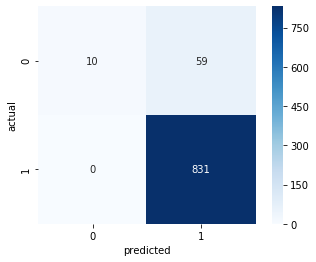

In [19]:
sns.heatmap(log_tfidf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d')
plt.ylabel('actual')
plt.xlabel('predicted')